In [193]:
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [194]:
import pandas as pd
import pandas_datareader as pdr
stocks = ['GOOG', 'AAPL','MSFT']
data = pdr.DataReader(stocks,'yahoo',start='2022-1-01', end='2022-10-12')
data = data.stack(level=1)
data = pd.DataFrame(data.to_records())
data.set_index('Date')
df =data.reindex()
df.head()


,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
0,2022-01-03,GOOG,145.074493,145.074493,145.550003,143.502502,144.475494,25214000.0
1,2022-01-03,AAPL,181.259933,182.009995,182.880005,177.710007,177.830002,104487900.0
2,2022-01-03,MSFT,332.577087,334.750000,338.000000,329.779999,335.350006,28865100.0
3,2022-01-04,GOOG,144.416504,144.416504,146.610001,143.816147,145.550507,22928000.0
4,2022-01-04,AAPL,178.959442,179.699997,182.940002,179.119995,182.630005,99310400.0


In [195]:
apple_df = df.loc[df['Symbols'] == 'AAPL'] 

apple_df = apple_df.sort_values('Date')
apple_df.head()

,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
1,2022-01-03,AAPL,181.259933,182.009995,182.880005,177.710007,177.830002,104487900.0
4,2022-01-04,AAPL,178.959442,179.699997,182.940002,179.119995,182.630005,99310400.0
7,2022-01-05,AAPL,174.199158,174.919998,180.169998,174.639999,179.610001,94537600.0
10,2022-01-06,AAPL,171.291183,172.000000,175.300003,171.639999,172.699997,96904000.0
13,2022-01-07,AAPL,171.460495,172.169998,174.139999,171.029999,172.889999,86709100.0


In [196]:
apple_df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,196.000000,196.000000,196.000000,196.000000,196.000000,1.960000e+02
mean,157.856069,158.155153,160.202908,156.033265,158.080204,8.905378e+07
std,12.288157,12.415156,12.304782,12.504373,12.523376,2.363241e+07
min,129.879593,130.059998,132.389999,129.039993,130.070007,5.121820e+07
25%,148.443806,148.650005,149.844997,145.672497,147.782501,7.334385e+07
50%,158.877831,159.260002,162.485001,156.870003,159.824997,8.489835e+07
75%,168.203884,168.527504,170.652496,166.642498,168.812500,9.874415e+07
max,181.259933,182.009995,182.940002,179.119995,182.630005,1.826020e+08


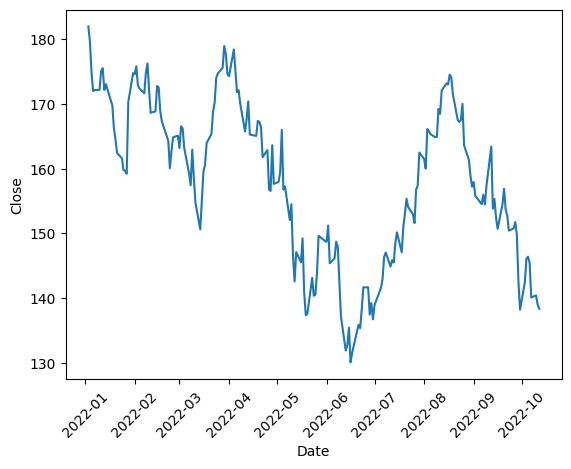

In [197]:
sns.lineplot(x=apple_df.Date,y=apple_df.Close)
plt.xticks(rotation=45)
plt.show()

In [198]:
pd.options.mode.chained_assignment = None
from cleanup import ema

ema(apple_df,1,'Close')

,Date,Symbols,Adj Close,Close,High,Low,Open,Volume,ema1
1,2022-01-03,AAPL,181.259933,182.009995,182.880005,177.710007,177.830002,104487900.0,182.009995
4,2022-01-04,AAPL,178.959442,179.699997,182.940002,179.119995,182.630005,99310400.0,180.469996
7,2022-01-05,AAPL,174.199158,174.919998,180.169998,174.639999,179.610001,94537600.0,177.298569
10,2022-01-06,AAPL,171.291183,172.000000,175.300003,171.639999,172.699997,96904000.0,174.472665
13,2022-01-07,AAPL,171.460495,172.169998,174.139999,171.029999,172.889999,86709100.0,173.284192
...,...,...,...,...,...,...,...,...,...
574,2022-10-06,AAPL,145.429993,145.429993,147.539993,145.220001,145.809998,68402200.0,145.380431
577,2022-10-07,AAPL,140.089996,140.089996,143.100006,139.449997,142.539993,85859100.0,142.735214
580,2022-10-10,AAPL,140.419998,140.419998,141.889999,138.570007,140.419998,74899000.0,141.577606
583,2022-10-11,AAPL,138.979996,138.979996,141.350006,138.220001,139.899994,77033700.0,140.278801


In [1]:
from cleanup import on_balance_volume
#on_balance_volume(apple_df,20,'Close','Volume')
